[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/zhimingkuang/Harvard-AM-115/blob/main/11_diffusion/central_limit.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define probability for a single process
s = [1/3, 1/3, 1/3] # uniform distribution
# s = [1/10, 2/5, 1/2] # a more weird distribution

nT = 10000 # number of trials
nP = 1 # number of processes (or steps) to sum over

N = nP # number of positive bins
p = np.zeros(2*N+1)
x = np.arange(2*N+1)+1-N-1

In [3]:
for i in range(nT):
    # Compute the sum of nP i.i.d processes
    v = 0
    for ip in range(nP):
        r = np.random.rand()
        if r < s[0]:
            v = v-1
        elif r < s[0] + s[1]:
            v = v+0
        else:
            v = v+1

    if N+1+v > 0 and N+1+v <= 2*N+1: # make sure index is not out of bound
        p[N+v] = p[N+v] + 1

In [4]:
# Customize for matplotlib
# If interested in the matplotlib object hierarchy, check: https://realpython.com/python-matplotlib-guide/
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['mathtext.default'] = 'regular'
# Change font size: http://www.futurile.net/2016/02/27/matplotlib-beautiful-plots-with-style/
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['figure.titlesize'] = 20

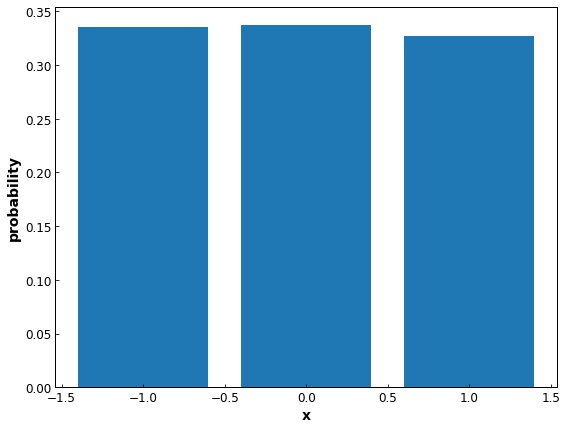

In [5]:
fig, ax = plt.subplots(1,1,figsize=(9,7))

# Plot simulation result
ax.bar(x, p/np.sum(p))

# Set axes labels and legend
ax.set_xlabel(r'$x$')
ax.set_ylabel('probability')

plt.show()